https://www.kaggle.com/c/bike-sharing-demand

datetime: 연,월,일에 대한 시간 데이터 <br>
season: 1 : spring , 2 = summer, 3 = fall, 4 = winter <br>
holiday: 공휴일, 주말(0:공휴일X 1:공휴일) <br>
workingday: 공휴일, 주말을 제외한 평일 <br>
weather : <br>
1: 깨끗한 날씨, 아주 약간의 구름<br>
    2: 흐림, 약간의 안개나 구름이 끼어있는 날씨<br>
    3: 약간의 눈, 비, 천둥<br>
    4: 아주 많은 눈, 비가 오거나 우박천둥<br>
temp: 기온 <br>
atemp: 체감온도 <br>
humidity: 습도 <br>
windspeed: 바람의 세기 <br>
casual: 비회원의 대여량 <br>
registered: 회원의 대여량 <br>
count: 총 대여량 <br>

In [2]:
import warnings 

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

df=pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<h1>1. 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [11]:
type(df['datetime'][0])

str

In [12]:
df['datetime']=pd.to_datetime(df['datetime'])

In [13]:
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df['second']=df['datetime'].dt.second
df['day_of_week']=df['datetime'].dt.dayofweek

In [15]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [16]:
df.loc[df['day_of_week']==0,'day_of_week_str']='Monday'
df.loc[df['day_of_week']==1,'day_of_week_str']='Tuesday'
df.loc[df['day_of_week']==2,'day_of_week_str']='Wednesday'
df.loc[df['day_of_week']==3,'day_of_week_str']='Thursday'
df.loc[df['day_of_week']==4,'day_of_week_str']='Friday'
df.loc[df['day_of_week']==5,'day_of_week_str']='Saturday'
df.loc[df['day_of_week']==6,'day_of_week_str']='Sunday'
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_of_week,day_of_week_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2,Wednesday


In [17]:
df[df['holiday']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_of_week,day_of_week_str
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17,2011,1,17,0,0,0,0,Monday
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16,2011,1,17,1,0,0,0,Monday
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8,2011,1,17,2,0,0,0,Monday
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2,2011,1,17,3,0,0,0,Monday
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3,2011,1,17,4,0,0,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,2012-11-12 19:00:00,4,1,0,1,22.14,25.760,73,19.0012,30,323,353,2012,11,12,19,0,0,0,Monday
10258,2012-11-12 20:00:00,4,1,0,2,21.32,25.000,77,19.0012,31,273,304,2012,11,12,20,0,0,0,Monday
10259,2012-11-12 21:00:00,4,1,0,3,22.14,25.760,73,15.0013,10,145,155,2012,11,12,21,0,0,0,Monday
10260,2012-11-12 22:00:00,4,1,0,1,21.32,25.000,77,16.9979,12,100,112,2012,11,12,22,0,0,0,Monday


In [18]:
df['day_of_week_str'].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day_of_week_str, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
corr = df[['temp','atemp','humidity', 'windspeed','casual', 'registered','count']].corr()

<AxesSubplot:>

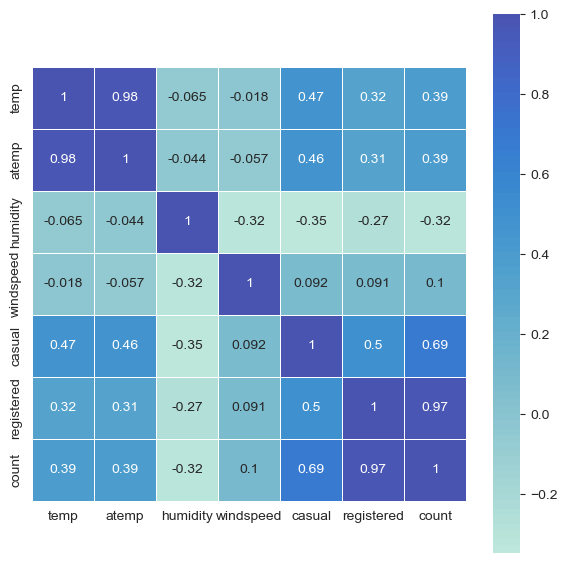

In [21]:
f,axes = plt.subplots(1,1,figsize = (7,7))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)

온도와 체감온도가 매우 강한 양의 상관 관계.<br>
windspeed(풍속)은 우리가 예측하고자 하는 casual(비회원), retistered(회원) 또는 대여수량에 상관관계가 없음.

Text(0.5, 1.0, 'Count per Year')

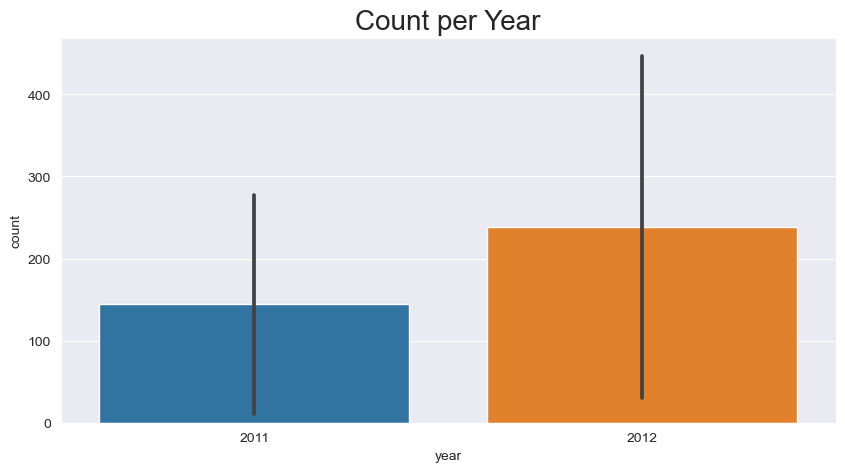

In [22]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='year',y='count',data=df,ci='sd')
plt.title("Count per Year",fontsize=20)

Text(0.5, 1.0, 'Count per Month')

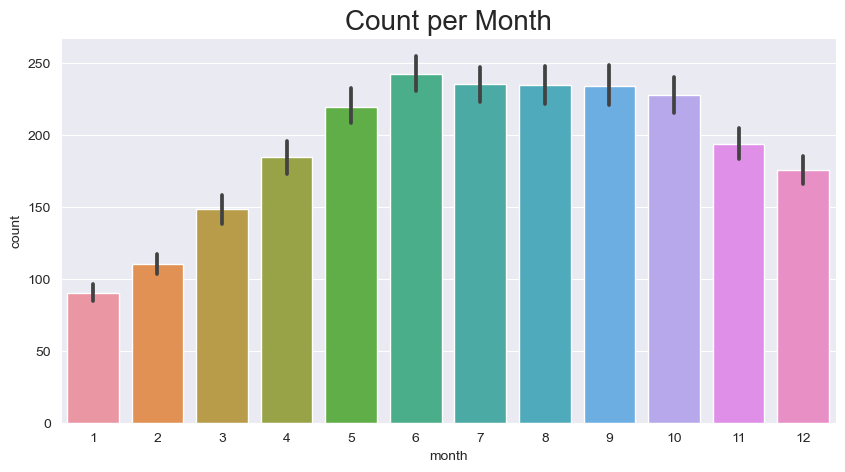

In [23]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',data=df)
plt.title("Count per Month",fontsize=20)

In [24]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month) #연과 월을 붙여서 확인

df["year_month"] = df["datetime"].apply(concatenate_year_month)

df[["datetime", "year_month"]].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [25]:
# fig, ax3 = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(18, 4)

# sns.barplot(data=df, x="year_month", y="count", ax=ax3)

- 2011년보다는 2012년에 대여량이 많다.
- 겨울보단 여름에 대여량이 많다.
- 대여량이 계속해서 증가하고 있다.

Text(0.5, 1.0, 'Count per day_of_week')

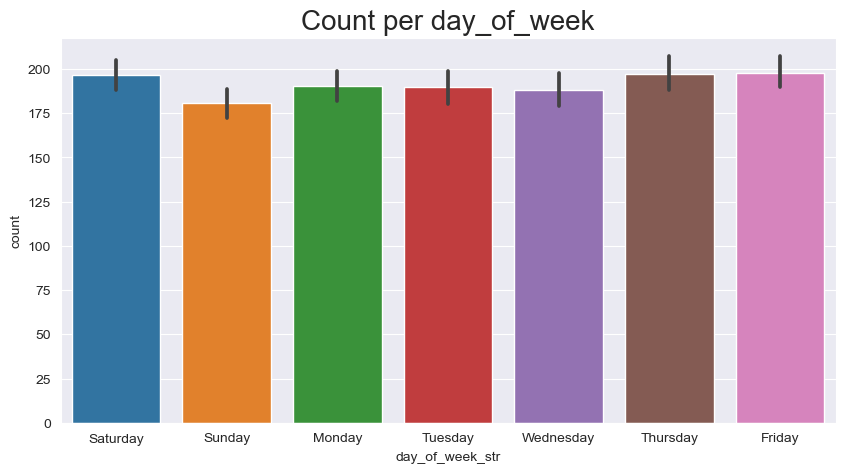

In [26]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week_str',y='count',data=df)
plt.title("Count per day_of_week",fontsize=20)

Text(0.5, 1.0, 'Count per Day')

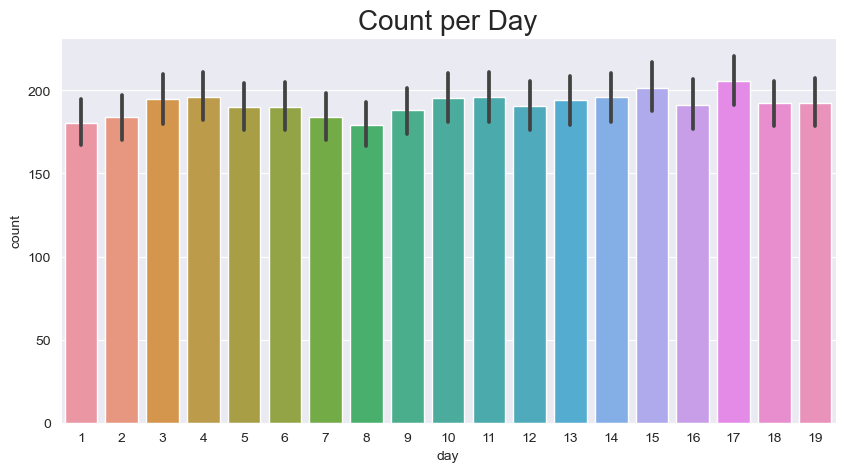

In [27]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='day',y='count',data=df)
plt.title("Count per Day",fontsize=20)

Text(0.5, 1.0, 'Count per Hour')

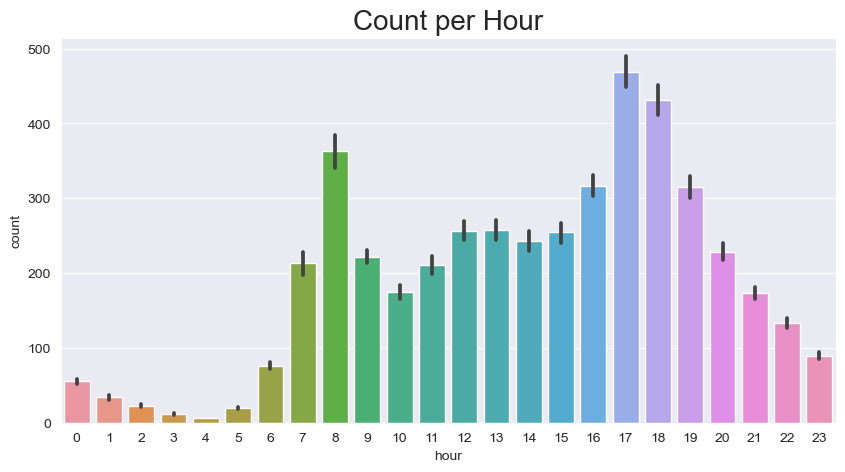

In [28]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='hour',y='count',data=df)
plt.title("Count per Hour",fontsize=20)

출퇴근 시간에 대여량이 가장 많다.

Text(0.5, 1.0, 'Count per Season')

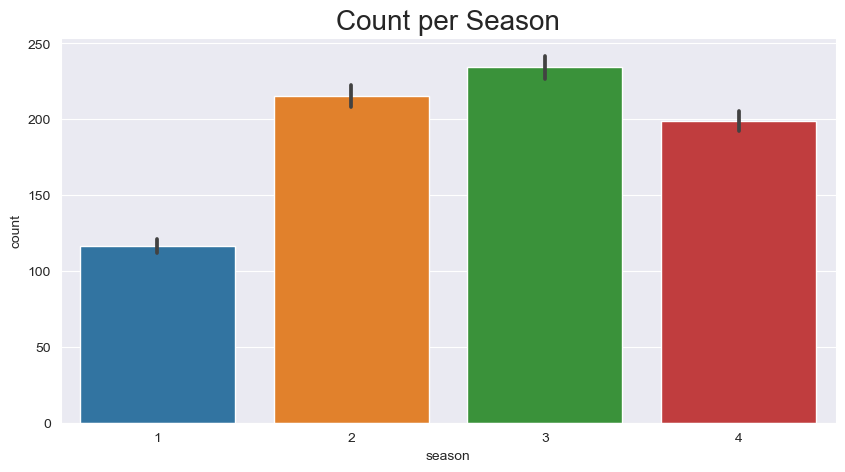

In [29]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='season',y='count',data=df)
plt.title("Count per Season",fontsize=20)

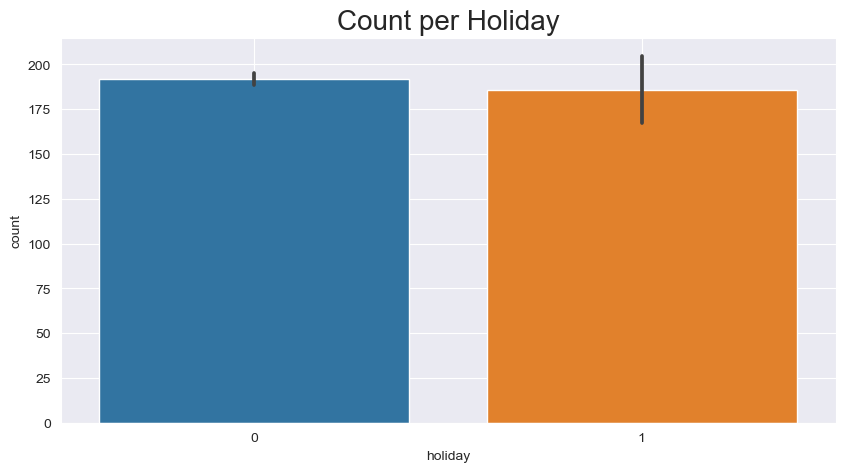

In [30]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='holiday',y='count',data=df)
plt.title("Count per Holiday",fontsize=20)
plt.grid(True)

<AxesSubplot:xlabel='weather', ylabel='count'>

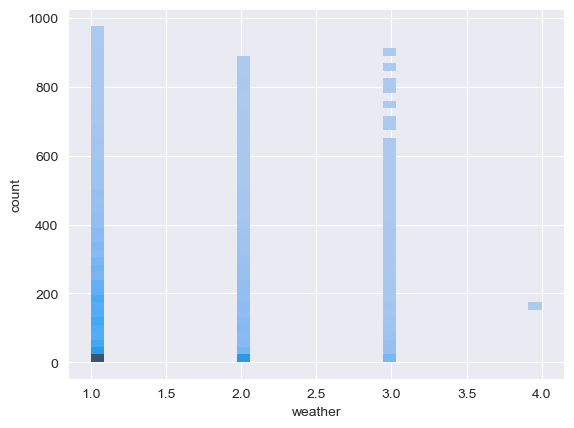

In [31]:
sns.histplot(df, x = 'weather', y= 'count')

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by holiday')]

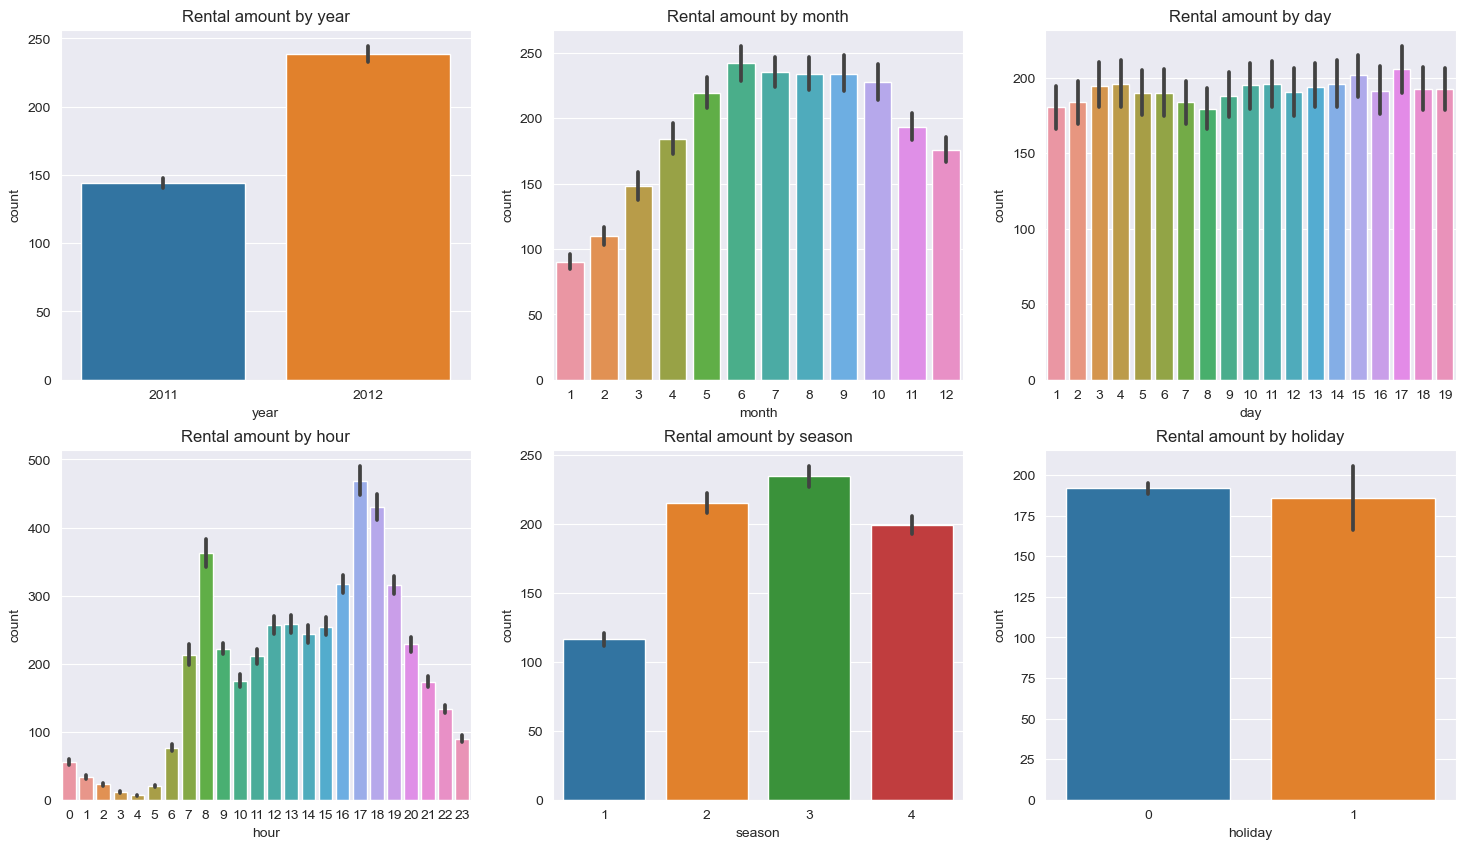

In [32]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=df, x = "year",y='count', ax = ax1)
sns.barplot(data=df, x = "month", y='count', ax = ax2)
sns.barplot(data=df, x = "day", y='count', ax = ax3)
sns.barplot(data=df, x = "hour", y='count', ax = ax4)
sns.barplot(data=df, x = "season", y='count', ax = ax5)
sns.barplot(data=df, x = "holiday", y='count', ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")
ax5.set(ylabel = "count", title = "Rental amount by season")
ax6.set(ylabel = "count", title = "Rental amount by holiday")

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by hour')]

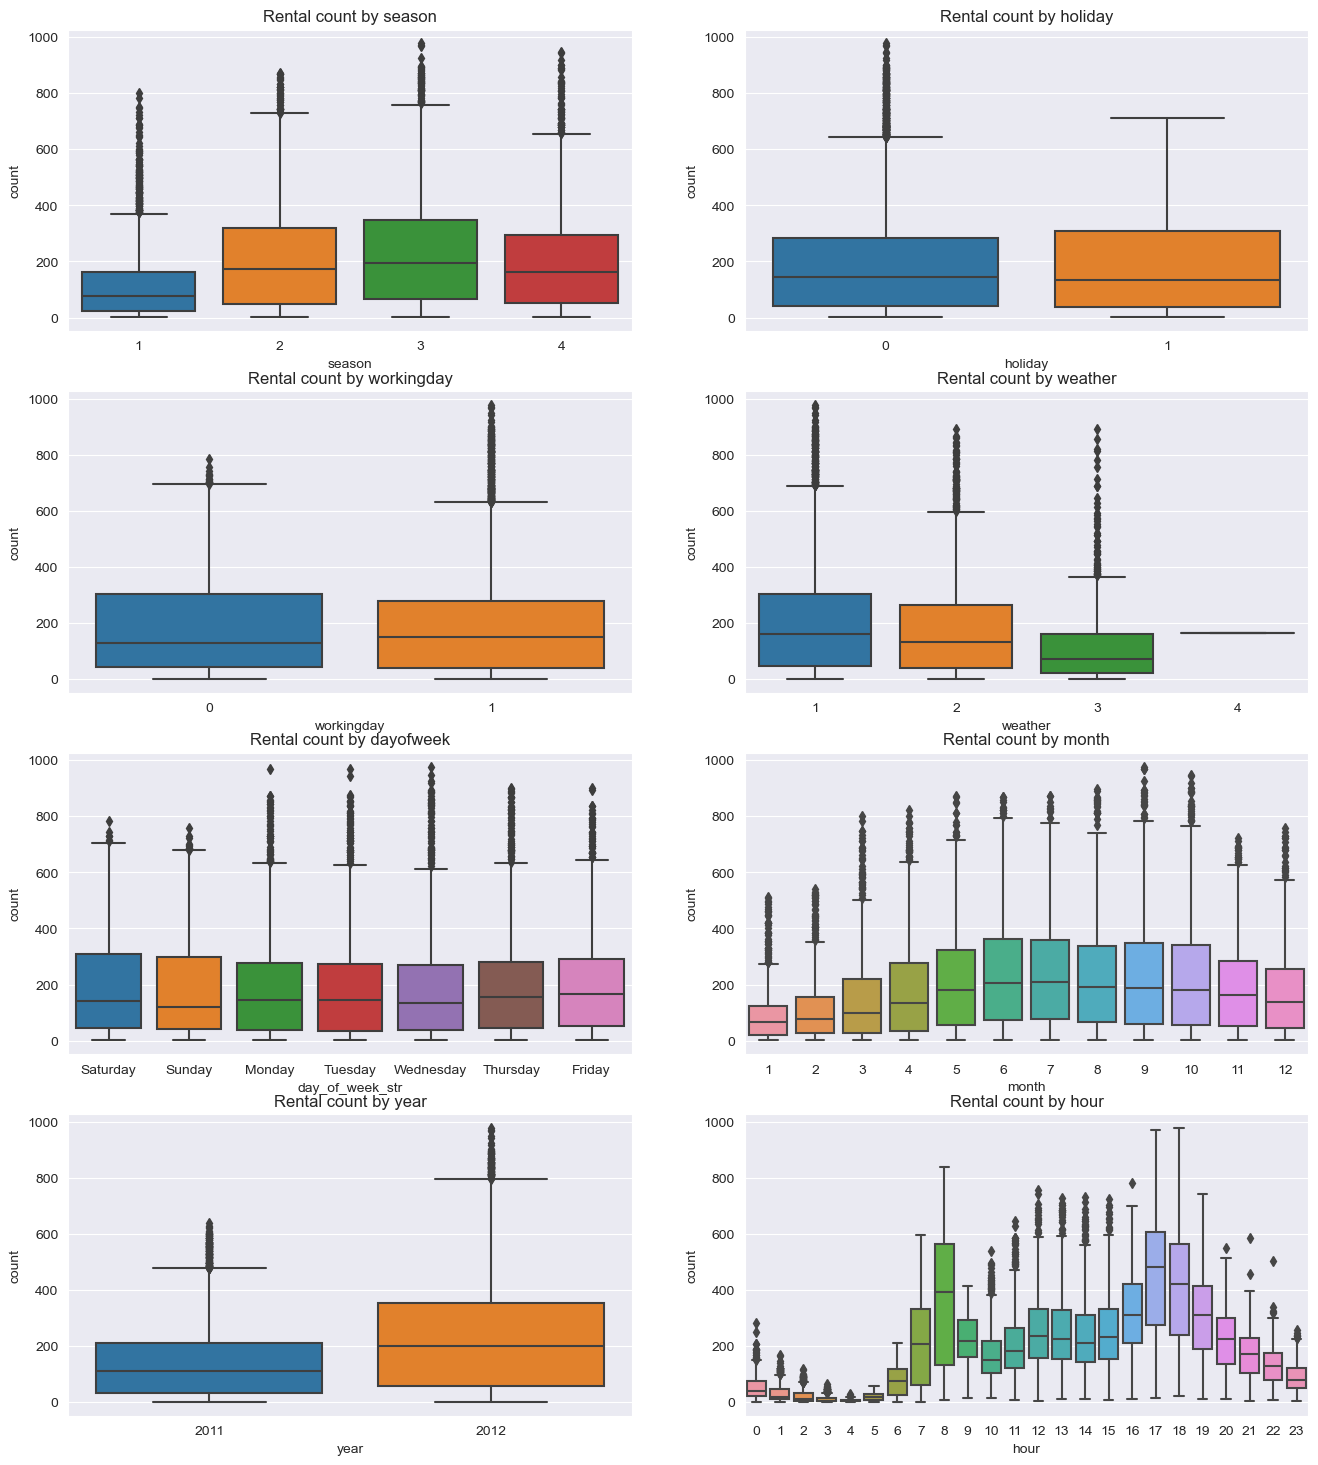

In [33]:
# 각 변수들을 이용해 Boxplor 그려주기
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(16, 18))
sns.boxplot(data = df, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = df, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = df, y="count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = df, y="count", x = "weather", orient = "v", ax = axes[1][1])
sns.boxplot(data = df, y="count", x = "day_of_week_str", orient = "v", ax = axes[2][0])
sns.boxplot(data = df, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = df, y="count", x = "year", orient = "v", ax = axes[3][0])
sns.boxplot(data = df, y="count", x = "hour", orient = "v", ax = axes[3][1])

axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")

2012년에 대여량 크게 증가.<br>
총 대여량은 휴일일 때와 아닐때의 차이가 거의 없어 보인다.

<AxesSubplot:ylabel='count'>

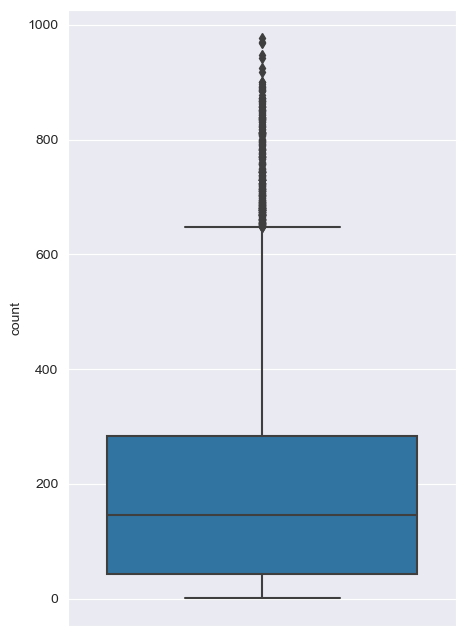

In [34]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y='count',data=df)

<AxesSubplot:ylabel='humidity'>

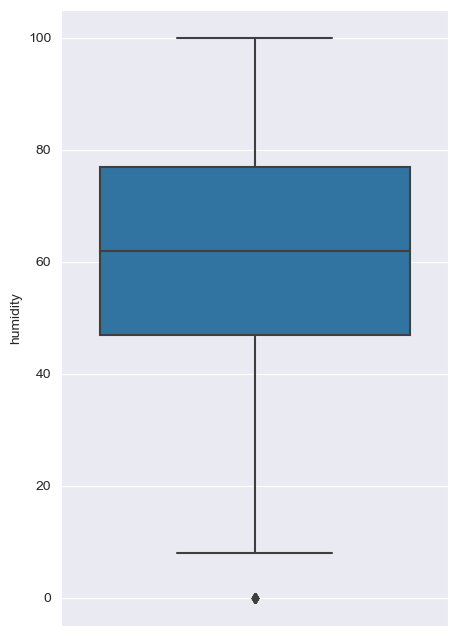

In [35]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y='humidity',data=df)

In [36]:
df = df.replace({'humidity':{0:df['humidity'].mean()}})

<AxesSubplot:ylabel='windspeed'>

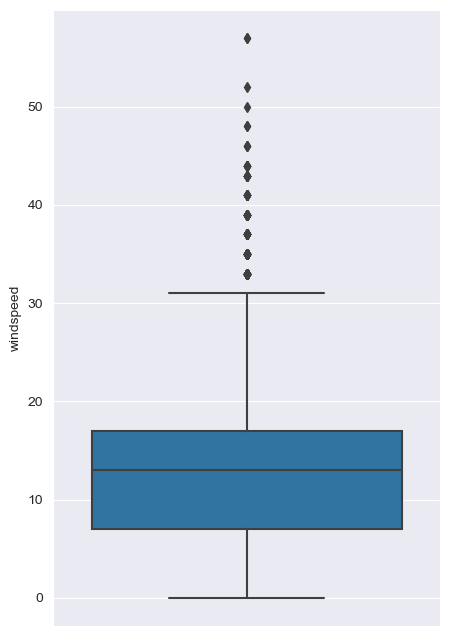

In [37]:
fig=plt.figure(figsize=(5,8))
sns.boxplot(y='windspeed',data=df)

Text(0.5, 1.0, 'Count - Windspeed')

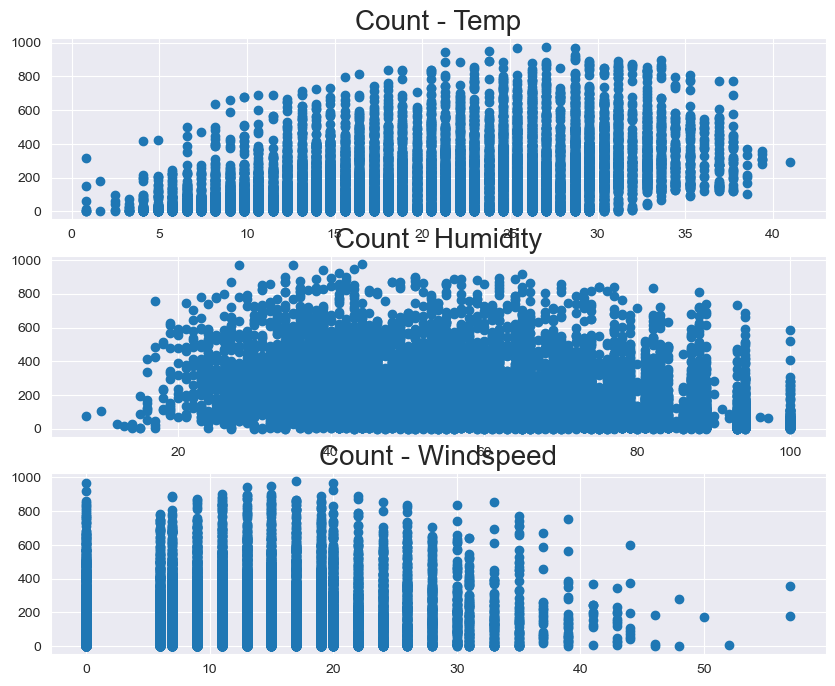

In [38]:
fig=plt.figure(figsize=(10,8))

fig.add_subplot(3,1,1)
plt.scatter(df['temp'],df['count'])
plt.title("Count - Temp",fontsize=20)


fig.add_subplot(3,1,2)
plt.scatter(df['humidity'],df['count'])
plt.title("Count - Humidity",fontsize=20)


fig.add_subplot(3,1,3)
plt.scatter(df['windspeed'],df['count'])
plt.title("Count - Windspeed",fontsize=20)

<AxesSubplot:xlabel='hour', ylabel='count'>

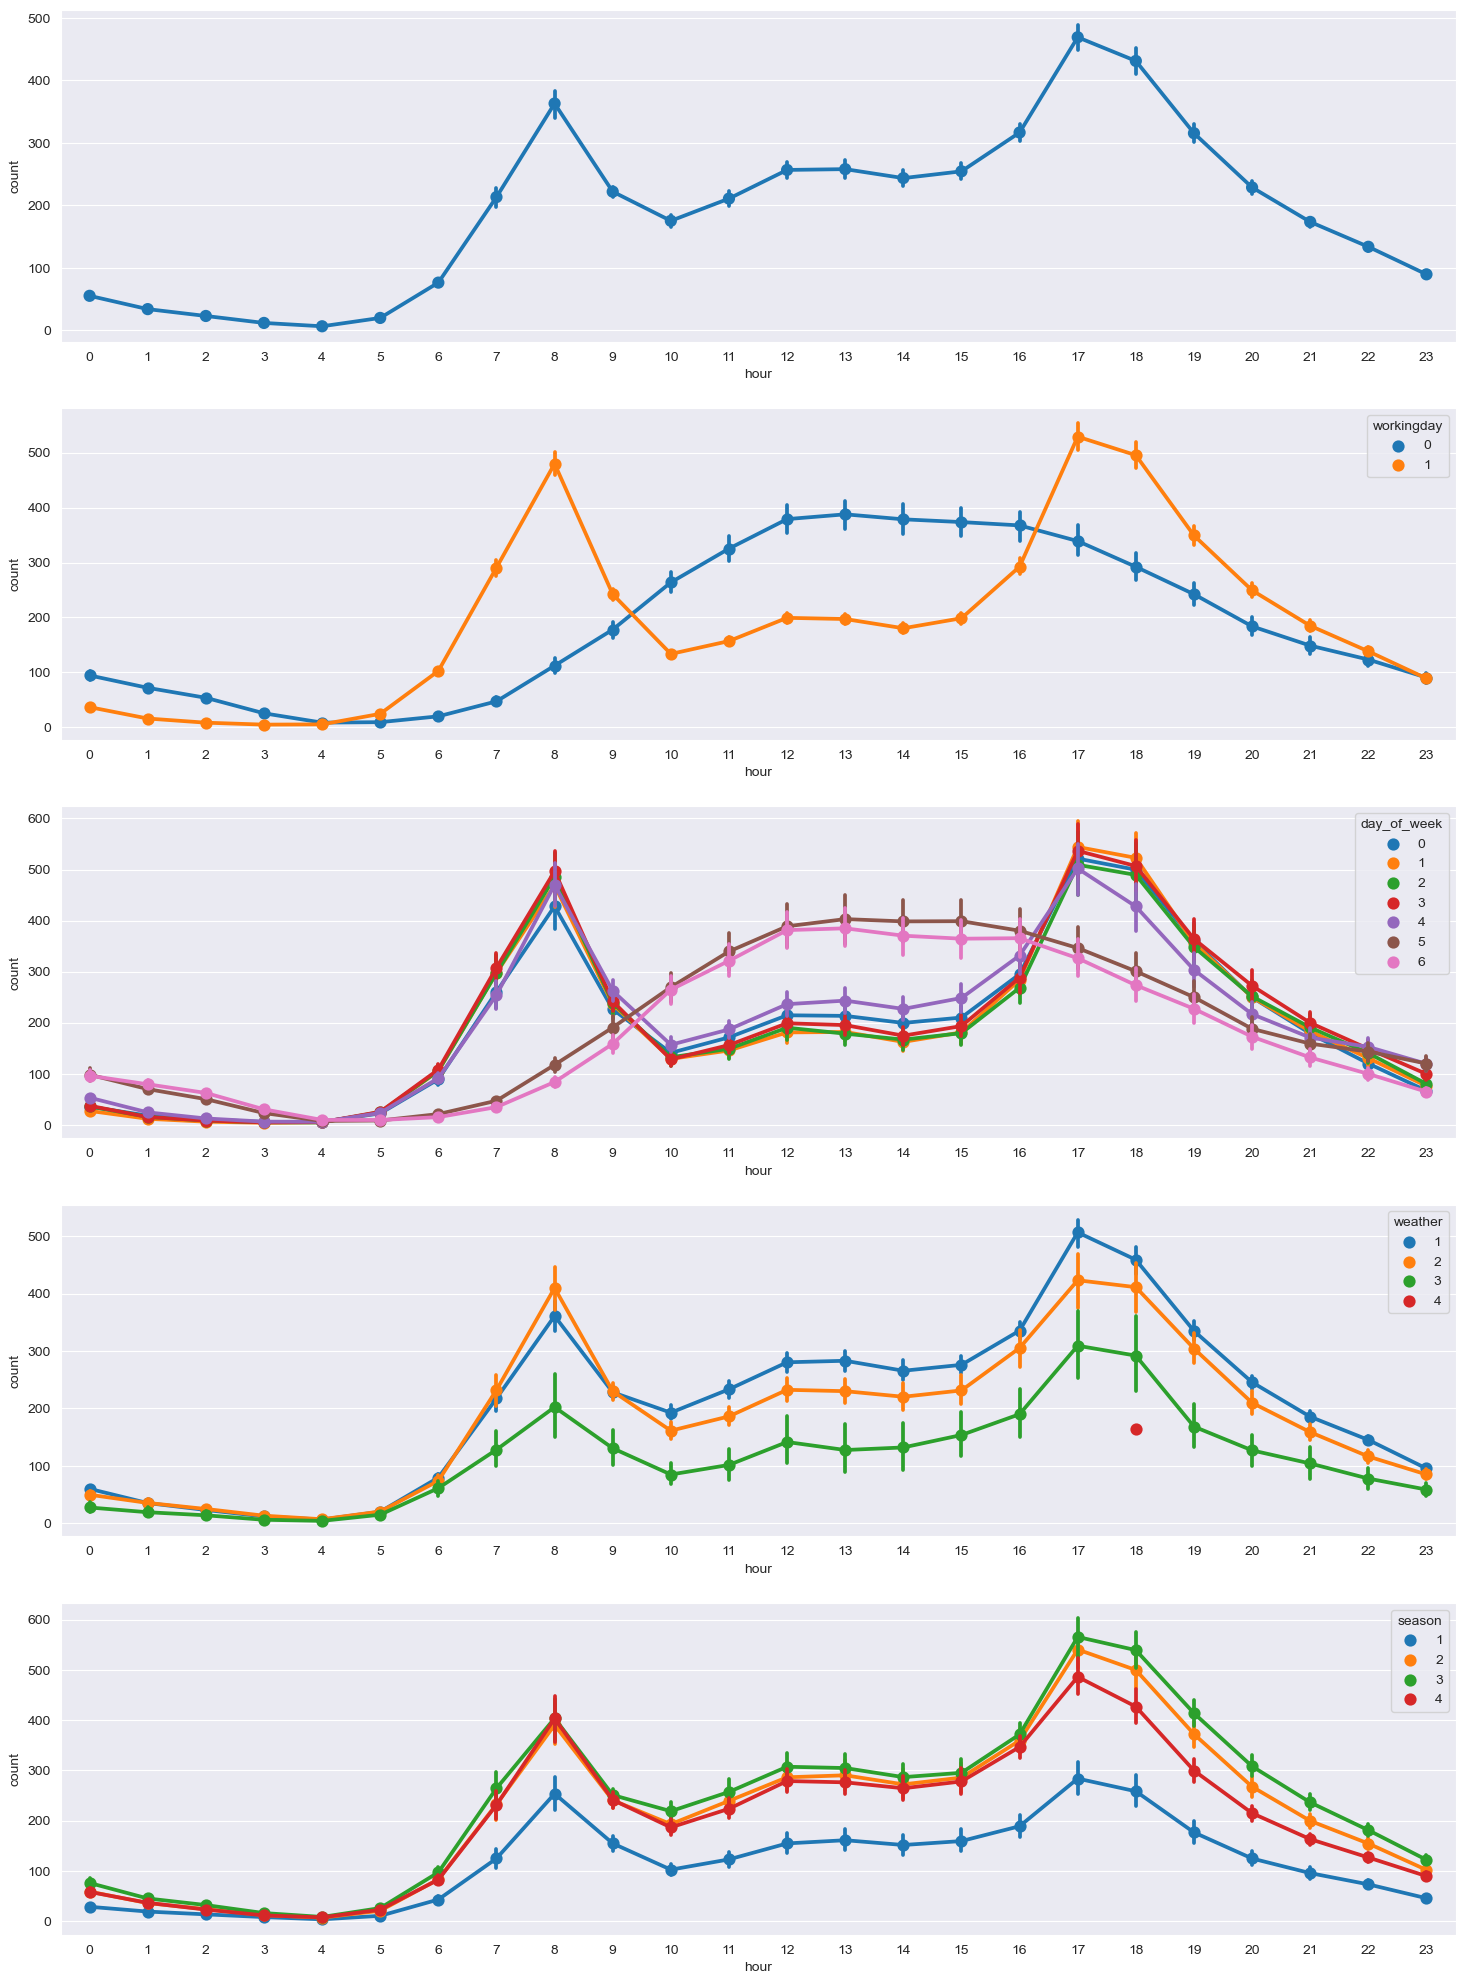

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = df, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = df, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = df, x = "hour", y = "count", hue = "day_of_week", ax = ax3)
sns.pointplot(data = df, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = df, x = "hour", y = "count", hue = "season",  ax = ax5)

<AxesSubplot:xlabel='count', ylabel='Density'>

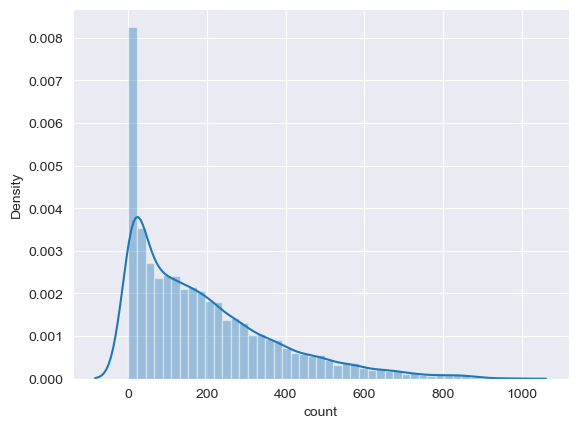

In [40]:
sns.distplot(df['count'])

count 칼럼 값이 정규 분포가 아닌 0~200 사이에 왜곡돼 있는 것을 알 수 있습니다. 이렇게 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것입니다. 여기서는 넘파이의 log1p()를 이용하겠습니다. 이렇게 변경된 Target 값을 기반으로 학습하고 예측한 값은 다시 expm1() 함수를 적용해 원래 scale 값으로 원상 복구하면 됩니다. log1p()를 적용한 count값의 분포를 확인하겠습니다.

<AxesSubplot:xlabel='count', ylabel='Density'>

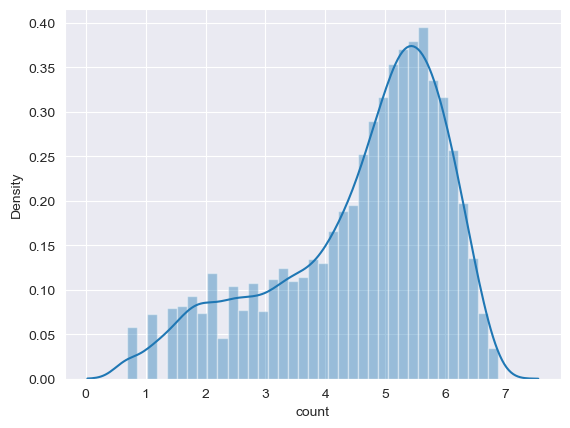

In [41]:
sns.distplot(np.log1p(df['count']))

원하는 정규 분포 형태는 아니지만 변환하기 전보다는 왜곡 정도가 많이 향상됐습니다. 이를 이용해 LinearRegression 모델을 학습한 후 평가를 수행해 보겠습니다.

In [42]:
df['count'] = np.log1p(df['count'])

In [43]:
# 풍속이 0인 데이터와 0이 아닌 데이터들로 나눠준다.
trainWind0 = df.loc[df["windspeed"] == 0]
trainWindNot0 = df.loc[df["windspeed"] != 0]

# 풍속이 0인 변수들을 머신러닝 모델을 사용하여 예측하고 예측된 값으로 대체해주는 방법
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

# 예측된 값이 잘 들어갔는지 확인
df = predict_windspeed(df)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,minute,second,day_of_week,day_of_week_str,year_month
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,...,0.693147,2011,1,1,5,0,0,5,Saturday,2011-1
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76.0,16.9979,12,...,3.610918,2011,1,1,10,0,0,5,Saturday,2011-1
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81.0,19.0012,26,...,4.043051,2011,1,1,11,0,0,5,Saturday,2011-1
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77.0,19.0012,29,...,4.442651,2011,1,1,12,0,0,5,Saturday,2011-1
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72.0,19.9995,47,...,4.553877,2011,1,1,13,0,0,5,Saturday,2011-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87.0,6.0032,21,...,5.451038,2012,12,17,12,0,0,0,Monday,2012-12
10882,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88.0,8.9981,15,...,5.356586,2012,12,17,15,0,0,0,Monday,2012-12
10883,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94.0,6.0032,10,...,6.496775,2012,12,18,8,0,0,1,Tuesday,2012-12
10884,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49.0,12.9980,5,...,4.890349,2012,12,18,22,0,0,1,Tuesday,2012-12


<h1>2. Test Data 불러오기

In [44]:
df_test=pd.read_csv('test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [46]:
df_test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [47]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [48]:
df_test['datetime']=pd.to_datetime(df['datetime'])

In [49]:
df_test['year']=df_test['datetime'].dt.year
df_test['month']=df_test['datetime'].dt.month
df_test['day']=df_test['datetime'].dt.day
df_test['hour']=df_test['datetime'].dt.hour
df_test['minute']=df_test['datetime'].dt.minute
df_test['second']=df_test['datetime'].dt.second
df_test['day_of_week']=df_test['datetime'].dt.dayofweek

In [50]:
df_test.loc[df_test['day_of_week']==0,'day_of_week_str']='Monday'
df_test.loc[df['day_of_week']==1,'day_of_week_str']='Tuesday'
df_test.loc[df['day_of_week']==2,'day_of_week_str']='Wednesday'
df_test.loc[df['day_of_week']==3,'day_of_week_str']='Thursday'
df_test.loc[df['day_of_week']==4,'day_of_week_str']='Friday'
df_test.loc[df['day_of_week']==5,'day_of_week_str']='Saturday'
df_test.loc[df['day_of_week']==6,'day_of_week_str']='Sunday'
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,day_of_week,day_of_week_str
0,2011-01-01 05:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,5,0,0,5,Saturday
1,2011-01-01 10:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,10,0,0,5,Saturday
2,2011-01-01 11:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,11,0,0,5,Saturday
3,2011-01-01 12:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,12,0,0,5,Saturday
4,2011-01-01 13:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,13,0,0,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-05-06 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,5,6,19,0,0,6,Sunday
6489,2012-05-06 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,5,6,20,0,0,6,Sunday
6490,2012-05-06 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,5,6,21,0,0,6,Sunday
6491,2012-05-06 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,5,6,22,0,0,6,Sunday


<h1>3. 독립변수, 종속변수 나누기

In [51]:
df_X=df[['season',
 'workingday',
 'weather',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour']]

df_X

,season,workingday,weather,atemp,humidity,windspeed,year,hour
0,1,0,2,12.880,75.0,6.0032,2011,5
1,1,0,1,19.695,76.0,16.9979,2011,10
2,1,0,1,16.665,81.0,19.0012,2011,11
3,1,0,1,21.210,77.0,19.0012,2011,12
4,1,0,2,22.725,72.0,19.9995,2011,13
...,...,...,...,...,...,...,...,...
10881,4,1,2,20.455,87.0,6.0032,2012,12
10882,4,1,2,21.210,88.0,8.9981,2012,15
10883,4,1,1,19.695,94.0,6.0032,2012,8
10884,4,1,1,16.665,49.0,12.9980,2012,22


연속형 피처 = temp,humidity,windspeed,atemp<br>
범주형 피처 = season,holiday,workingday,weather,dayofweek,month,year,hour

In [52]:
categorical_feature_names = ["season","weather","year","hour"]
df_X=pd.get_dummies(df_X,columns=categorical_feature_names)

df_X

,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,12.880,75.0,6.0032,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,19.695,76.0,16.9979,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,16.665,81.0,19.0012,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,21.210,77.0,19.0012,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,22.725,72.0,19.9995,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,20.455,87.0,6.0032,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10882,1,21.210,88.0,8.9981,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
10883,1,19.695,94.0,6.0032,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10884,1,16.665,49.0,12.9980,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
df_Y=df[['count']].values
np.reshape(df_Y,(-1,1))
df_Y.shape


(10886, 1)

In [54]:
test=df_test[['season',
 'workingday',
 'weather',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour']]


In [55]:
test=pd.get_dummies(test,columns=categorical_feature_names)
test

,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,11.365,56,26.0027,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,13.635,56,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13.635,56,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,12.880,56,11.0014,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,12.880,56,11.0014,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,12.880,60,11.0014,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6489,1,12.880,60,11.0014,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6490,1,12.880,60,11.0014,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6491,1,13.635,56,8.9981,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df_X.describe()

,workingday,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.680875,23.655084,62.011529,13.951116,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,...,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889
std,0.466159,8.474601,19.042449,7.062014,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,...,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344
min,0.000000,0.760000,8.000000,6.003200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.665000,47.000000,8.998100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,24.240000,62.000000,12.998000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,31.060000,77.000000,19.001200,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,45.455000,100.000000,56.996900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_X,df_Y,test_size=0.3,random_state=9)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((7620, 38), (7620, 1), (3266, 38), (3266, 1))

In [58]:
!pip install xgboost

In [59]:
!pip install lightgbm

<h1>4. 학습하기

In [60]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

reg1=Ridge(alpha=10)
reg2=Lasso(alpha=0.01)
reg3=KNeighborsRegressor()
reg4=RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=9)
reg5=GradientBoostingRegressor()
reg6=XGBRegressor()
reg7=LGBMRegressor()

In [61]:
!pip install statsmodels

In [62]:
import statsmodels.api as sm
x=sm.add_constant(df_X)  # 상수항 추가
lr=sm.OLS(df_Y,x)
result1= lr.fit()
print(result1.summary())
print('가중치 벡터값',result1.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1556.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:24   Log-Likelihood:                -9621.7
No. Observations:               10886   AIC:                         1.931e+04
Df Residuals:                   10851   BIC:                         1.957e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9808      0.075     26.341      0.0

In [72]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
reg4.fit(X_train,y_train)
reg5.fit(X_train,y_train)
reg6.fit(X_train,y_train)
reg7.fit(X_train,y_train)

LGBMRegressor()

<h1>5. 예측하기

In [74]:
pred_data1=reg1.predict(X_test)
pred_data2=reg2.predict(X_test)
pred_data3=reg3.predict(X_test)
pred_data4=reg4.predict(X_test)
pred_data5=reg5.predict(X_test)
pred_data6=reg6.predict(X_test)
pred_data7=reg7.predict(X_test)

In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [76]:
mse1=(mean_squared_error(y_test,pred_data1))
mse2=(mean_squared_error(y_test,pred_data2))
mse3=(mean_squared_error(y_test,pred_data3))
mse4=(mean_squared_error(y_test,pred_data4))
mse5=(mean_squared_error(y_test,pred_data5))
mse6=(mean_squared_error(y_test,pred_data6))
mse7=(mean_squared_error(y_test,pred_data7))

In [77]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test_exp, pred_exp):
    msle = mean_squared_log_error(y_test_exp, pred_exp)
    rmsle = msle**0.5
    return rmsle

In [78]:
print('Ridge Regression')
print('MSE ',mse1)
print('RMSE ',np.sqrt(mse1))
print('RMSLE ',rmsle(y_test,pred_data1))
print('-'*50)

print('Lasso Regression')
print('MSE ',mse2)
print('RMSE ',np.sqrt(mse2))
print('RMSLE ',rmsle(y_test,pred_data2))
print('-'*50)

print('KNeighborsRegressor')
print('MSE ',mse3)
print('RMSE ',np.sqrt(mse3))
print('RMSLE ',rmsle(y_test,pred_data3))
print('-'*50)

print('RandomForestRegressor')
print('MSE ',mse4)
print('RMSE ',np.sqrt(mse4))
print('RMSLE ',rmsle(y_test,pred_data4))
print('-'*50)

print('GradientBoostRegressor')
print('MSE ',mse5)
print('RMSE ',np.sqrt(mse5))
print('RMSLE ',rmsle(y_test,pred_data5))
print('-'*50)

print('XGBRegressor')
print('MSE ',mse6)
print('RMSE ',np.sqrt(mse6))
print('RMSLE ',rmsle(y_test,pred_data6))
print('-'*50)

print('LGBMRegressor')
print('MSE ',mse7)
print('RMSE ',np.sqrt(mse7))
print('RMSLE ',rmsle(y_test,pred_data7))


Ridge Regression
MSE  0.35156042280558975
RMSE  0.5929253096348559
RMSLE  0.1420092576227508
--------------------------------------------------
Lasso Regression
MSE  0.40372875607761577
RMSE  0.6353965345181037
RMSLE  0.15171961052412697
--------------------------------------------------
KNeighborsRegressor
MSE  1.4703051103370097
RMSE  1.2125613841521632
RMSLE  0.2729728335781401
--------------------------------------------------
RandomForestRegressor
MSE  0.13477058308504053
RMSE  0.36711113179123367
RMSLE  0.09501483450011176
--------------------------------------------------
GradientBoostRegressor
MSE  0.23400399951252313
RMSE  0.4837395988675344
RMSLE  0.1142242976908376
--------------------------------------------------
XGBRegressor
MSE  0.12917520276630787
RMSE  0.3594095195822001
RMSLE  0.09587094115725785
--------------------------------------------------
LGBMRegressor
MSE  0.12118448032144095
RMSE  0.34811561344105346
RMSLE  0.09039493352333458


In [80]:
print('Ridge Regression Score')
print(reg1.score(X_test,y_test))
print('-'*50)

print('Lasso Regression Score')
print(reg2.score(X_test,y_test))
print('-'*50)

print('KNeighborsRegressor Score')
print(reg3.score(X_test,y_test))
print('-'*50)

print('RandomForestRegressor Score')
print(reg4.score(X_test,y_test))
print('-'*50)

print('GradientBoostingRegressor Score')
print(reg5.score(X_test,y_test))
print('-'*50)

print('XGBRegressor Score')
print(reg6.score(X_test,y_test))
print('-'*50)

print('LGBMRegressor Score')
print(reg7.score(X_test,y_test))



Ridge Regression Score
0.828307419732184
--------------------------------------------------
Lasso Regression Score
0.8028298199606687
--------------------------------------------------
KNeighborsRegressor Score
0.28194284168808514
--------------------------------------------------
RandomForestRegressor Score
0.9341817006322568
--------------------------------------------------
GradientBoostingRegressor Score
0.8857187901053604
--------------------------------------------------
XGBRegressor Score
0.9369143326982793
--------------------------------------------------
LGBMRegressor Score
0.9408167849248822


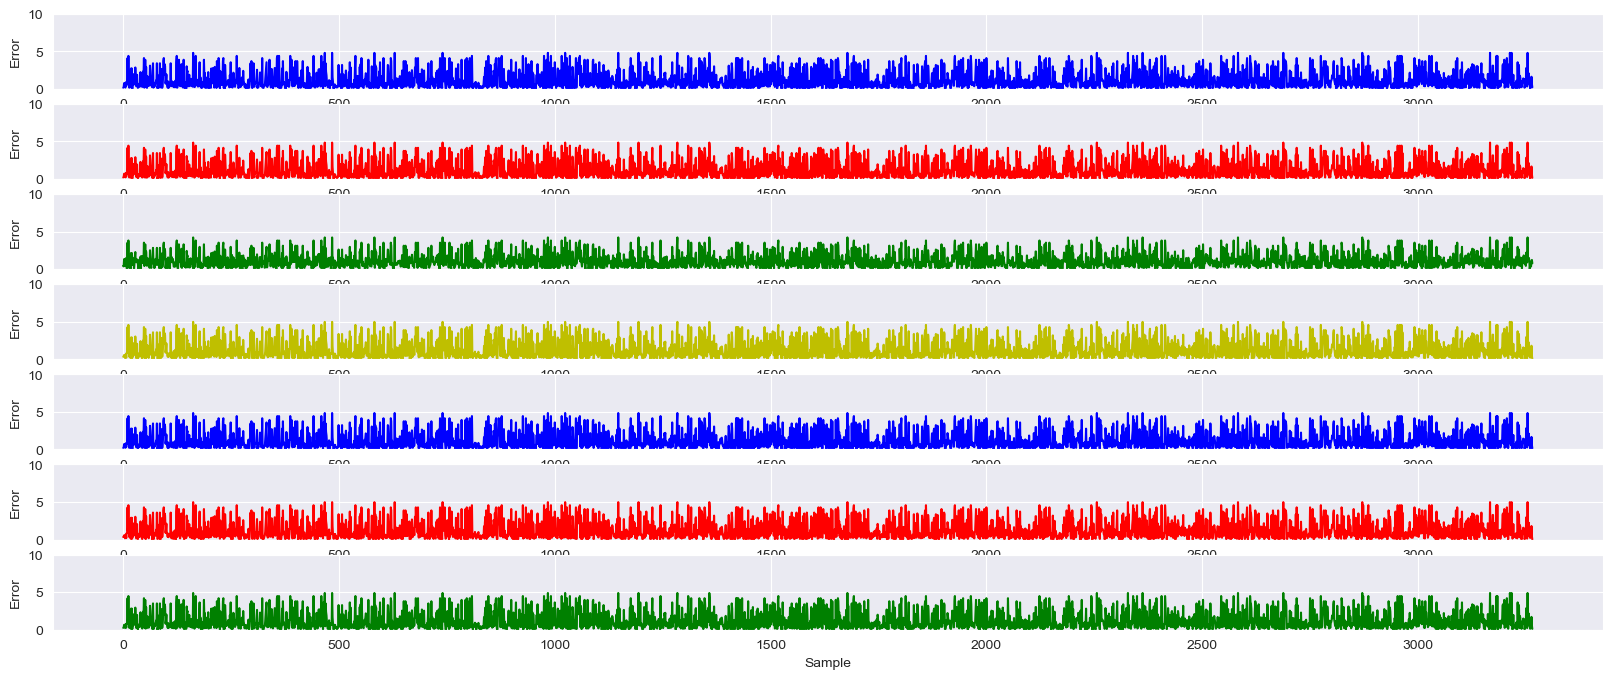

In [81]:

fig=plt.figure(figsize=(20,8))

fig.add_subplot(7,1,1)
plt.plot(np.sqrt(np.power(pred_data1[0]-y_test,2)),color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,2)
plt.plot(np.sqrt(np.power(pred_data2[0]-y_test,2)),color='r')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,3)
plt.plot(np.sqrt(np.power(pred_data3[0]-y_test,2)),color='g')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,4)
plt.plot(np.sqrt(np.power(pred_data4[0]-y_test,2)),color='y')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,5)
plt.plot(np.sqrt(np.power(pred_data5[0]-y_test,2)),color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,6)
plt.plot(np.sqrt(np.power(pred_data6[0]-y_test,2)),color='r')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])

fig.add_subplot(7,1,7)
plt.plot(np.sqrt(np.power(pred_data7[0]-y_test,2)),color='g')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,10])


plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV 

param_grid={
    "max_depth":[3,5,-1],
    "learning_rate":[0.1,0.01,1,100,10,0.001],
    "n_estimators":[50,100]
} 

gcv=GridSearchCV(reg7,param_grid,scoring='neg_mean_squared_error',verbose=2)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 1, 100, 10, 0.001],
                         'max_depth': [3, 5, -1], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [86]:
print(gcv.best_estimator_)

LGBMRegressor()
LGBMRegressor()
LGBMRegressor()
LGBMRegressor()


In [87]:
print(gcv.best_params_)

{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100}


In [88]:
final_model=gcv.best_estimator_

In [89]:
result_final=final_model.predict(X_test)

In [90]:
print('Best LightGBM')
print(mean_squared_error(y_test,result_final))

Best LightGBM
0.12118448032144095


In [82]:
# rf=RandomForestRegressor()
# # rf.fit(df_X,df_Y)

In [83]:
# pred_data4=rf.predict(test)ㅡ

In [91]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(df_X,df_Y)
pred = reg6.predict(test)
print(pred)
pred_exp = np.expm1(pred)
pred_exp.mean()

[1.6541797 3.961202  3.9546983 ... 4.720617  4.5481553 3.9888072]


160.55188

In [92]:
submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = pred_exp
print(pred_exp)
submission.head()

[  4.228789  51.520412  51.17995  ... 111.237465  93.458     52.99045 ]


,datetime,count
0,2011-01-20 00:00:00,4.228789
1,2011-01-20 01:00:00,51.520412
2,2011-01-20 02:00:00,51.179951
3,2011-01-20 03:00:00,67.241020
4,2011-01-20 04:00:00,61.939369


In [93]:
save_path = '.'

submission.to_csv( save_path+'/_submission.csv', 
                  index=False)